# Simple Convolutional Autoencoder : MNIST dataset

Using TensorFlow backend.


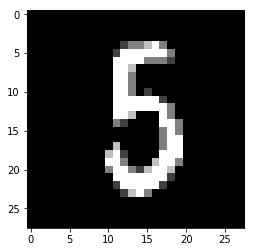

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import keras as k
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.imshow(X_train[5678],cmap='gray')
Xme=X_train

In [12]:
from keras.utils import to_categorical
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
#noisy=noisy.reshape(60000,28,28,1)
print(y_train[0])
print(X_train.shape)
#print(noisy.shape)
print(X_test.shape)
print(y_test.shape)
X_train= X_train.astype('float32')
X_train /= 255.

[[ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]]
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 10, 2)


In [13]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout, GlobalAveragePooling2D,Reshape
from keras.layers import Flatten, Dense,UpSampling2D

model = Sequential()

#Encoder
model.add(Convolution2D(32, (2, 2), input_shape=(28,28,1),activation='relu', padding="same"))
model.add(MaxPooling2D(2))
model.add(Dropout(0.2))

model.add(Convolution2D(16, (2, 2),activation='relu', padding="same"))
model.add(MaxPooling2D(2))
model.add(Dropout(0.2))

model.add(Convolution2D(8, (2, 2),activation='relu', padding="same"))
#model.add(MaxPooling2D(2)
model.add(Dropout(0.2))

model.add(Convolution2D(16, (2, 2),activation='relu', padding="same"))
#model.add(MaxPooling2D(2))
model.add(Dropout(0.2))

#Decoder

#model.add(UpSampling2D(size=(7,7)))
#model.add(Convolution2D(8, (2, 2),activation='relu', padding="same"))
#model.add(Dropout(0.1))

model.add(UpSampling2D(size=(2,2)))
model.add(Convolution2D(32,(2, 2),activation='relu', padding="same"))
model.add(Dropout(0.2))

model.add(UpSampling2D(size=(2,2)))
model.add(Convolution2D(16, (2, 2),activation='relu', padding="same"))
model.add(Dropout(0.2))

#model.add(Convolution2D(8, (2, 2),activation='relu', padding="same"))
#model.add(Dropout(0.2))

model.add(Dense(1,activation="sigmoid"))
model.add(Dropout(0.2))

          
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_56 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 14, 14, 16)        2064      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_57 (Dropout)         (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 7, 7, 8)           520       
__________

In [14]:
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
X=np.reshape(X_train,[60000,28,28,1])
model.compile(optimizer ='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [15]:
hist = model.fit(X_train,X_train, validation_split = 0.2, epochs = 5, batch_size=128, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 466s 10ms/step - loss: 0.6424 - acc: 0.7700 - val_loss: 0.1694 - val_acc: 0.8057
Epoch 2/5
48000/48000 [==============================] - 451s 9ms/step - loss: 0.5620 - acc: 0.7959 - val_loss: 0.1601 - val_acc: 0.8076
Epoch 3/5
48000/48000 [==============================] - 367s 8ms/step - loss: 0.5542 - acc: 0.7982 - val_loss: 0.1520 - val_acc: 0.8088
Epoch 4/5
48000/48000 [==============================] - 281s 6ms/step - loss: 0.5482 - acc: 0.8001 - val_loss: 0.1471 - val_acc: 0.8099
Epoch 5/5
48000/48000 [==============================] - 453s 9ms/step - loss: 0.5451 - acc: 0.8015 - val_loss: 0.1433 - val_acc: 0.8104


In [16]:
hist = model.fit(X_train,X_train, validation_split = 0.2, epochs = 20, batch_size=128, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 455s 9ms/step - loss: 0.5444 - acc: 0.8019 - val_loss: 0.1422 - val_acc: 0.8106
Epoch 2/20
48000/48000 [==============================] - 449s 9ms/step - loss: 0.5409 - acc: 0.8029 - val_loss: 0.1386 - val_acc: 0.8110
Epoch 3/20
48000/48000 [==============================] - 455s 9ms/step - loss: 0.5391 - acc: 0.8035 - val_loss: 0.1371 - val_acc: 0.8114
Epoch 4/20
48000/48000 [==============================] - 445s 9ms/step - loss: 0.5388 - acc: 0.8039 - val_loss: 0.1348 - val_acc: 0.8113
Epoch 5/20
48000/48000 [==============================] - 454s 9ms/step - loss: 0.5372 - acc: 0.8043 - val_loss: 0.1331 - val_acc: 0.8116
Epoch 6/20
48000/48000 [==============================] - 448s 9ms/step - loss: 0.5362 - acc: 0.8045 - val_loss: 0.1324 - val_acc: 0.8116
Epoch 7/20
48000/48000 [==============================] - 447s 9ms/step - loss: 0.5357 - acc: 0.8048 - val_loss: 0.1312 - 

In [56]:
hist = model.fit(X_train,X_train, validation_split = 0.2, epochs = 25, batch_size=128, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 317s 7ms/step - loss: 0.5314 - acc: 0.8059 - val_loss: 0.1273 - val_acc: 0.8123
Epoch 2/25
48000/48000 [==============================] - 279s 6ms/step - loss: 0.5312 - acc: 0.8059 - val_loss: 0.1272 - val_acc: 0.8124
Epoch 3/25
48000/48000 [==============================] - 262s 5ms/step - loss: 0.5335 - acc: 0.8055 - val_loss: 0.1308 - val_acc: 0.8119
Epoch 4/25
48000/48000 [==============================] - 262s 5ms/step - loss: 0.5325 - acc: 0.8056 - val_loss: 0.1283 - val_acc: 0.8122
Epoch 5/25
48000/48000 [==============================] - 262s 5ms/step - loss: 0.5315 - acc: 0.8059 - val_loss: 0.1281 - val_acc: 0.8124
Epoch 6/25
48000/48000 [==============================] - 262s 5ms/step - loss: 0.5313 - acc: 0.8059 - val_loss: 0.1269 - val_acc: 0.8122
Epoch 7/25
48000/48000 [==============================] - 261s 5ms/step - loss: 0.5309 - acc: 0.8059 - val_loss: 0.1277 - 

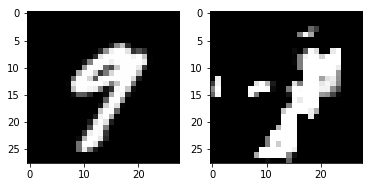

In [79]:
index=20
x1=np.reshape(X_test[index],[1,28,28,1])
y1=model.predict(x1)
y1=np.reshape(y1,[28,28])
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(np.reshape(x1,[28,28]),cmap="gray")
f.add_subplot(1,2, 2)
plt.imshow(y1,cmap="gray")

In [80]:
model.save('model_simple_conv_ae.h5')

In [6]:
from keras.models import load_model
import tensorflow
from tensorflow.losses import sigmoid_cross_entropy
model = load_model('model_cae.h5')